In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from skimage import feature as F
import pickle as pk
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.model_selection import GridSearchCV
import seaborn as sn
import os
import warnings
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')
warnings.filterwarnings("ignore")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def accuracy(actual,predicted):  
      c = 0
      for i in range(len(actual)):
          if(actual[i]!=predicted[i]):
              continue
          else:    
              c = c + 1
      return c/len(actual)
      
def unpickle(file):
  train = []
  files = os.listdir(path)
  for f in files:
    if f[0]=='d':
      p = file + str(f)
      with open(p, 'rb') as fo:
        d = pk.load(fo, encoding='bytes')
        train.append(d)
    elif f =='test_batch':
      p = file + str(f)
      with open(p, 'rb') as fo:
        d = pk.load(fo, encoding='bytes')
        test = d
  return  train , test 

path = '/content/drive/My Drive/Projects/ML_Assignment/ML_Assignment_3/cifar-10-batches-py/'
train , test  = unpickle(path)

In [5]:
XTrain = []
XTest = []
YTrain = []
YTest = []
for i in train:
  YTrain.append(np.array(i[b'labels']))
  XTrain.append(i[b'data'])

XTrain = np.concatenate(XTrain,axis=0)
YTrain = np.concatenate(YTrain,axis=0)
YTest = np.array(test[b'labels'])
XTest = test[b'data']

In [ ]:
# 1.1.a.

# def UPCA(Data,n):
#   Red = PCA()
#   Red = Red.fit(Data)
#   x = np.cumsum(Red.explained_variance_ratio_)
#   for i in range(x.shape[0]):
#     if x[i]>0.9:
#       n = i
#       break 
#   plt.plot(x)    
#   plt.grid()  
#   plt.xlabel('No. of Components') 
#   plt.ylabel('Cumulative Variance Explained')  
#   plt.show()    
#   print('\n',n)
#   Red = PCA(n_components=n)
#   Reddata = Red.fit_transform(Data)  
#   return Reddata

# Reddata1 = UPCA(XTrain,n=99)
# Reddata2 = UPCA(XTest,n=99)

In [ ]:
# path = '/content/drive/My Drive/Projects/ML_Assignment/ML_Assignment_3/Saved_Models/1.3/redpca1'
# pk.dump(Reddata1, open(path, "wb"))
# path = '/content/drive/My Drive/Projects/ML_Assignment/ML_Assignment_3/Saved_Models/1.3/redpca2'
# pk.dump(Reddata2, open(path, "wb"))

In [9]:
path = '/content/drive/My Drive/Projects/ML_Assignment/ML_Assignment_3/Saved_Models/1.3/redpca1'
Reddata1 = pk.load(open(path,'rb')) 
path = '/content/drive/My Drive/Projects/ML_Assignment/ML_Assignment_3/Saved_Models/1.3/redpca2'
Reddata2 = pk.load(open(path,'rb')) 
print(Reddata1.shape)
print(Reddata2.shape)

(50000, 99)
(10000, 99)


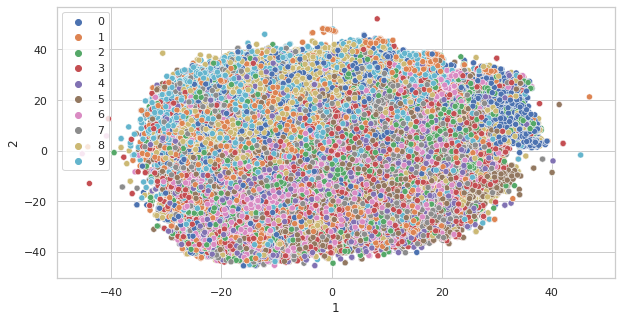

time: 21min 45s


In [ ]:
# 1.2.

def UTSNE(Data,Label):
  tsne = TSNE(n_components=2)
  df1_i_2 = tsne.fit_transform(Data)
    
  df1_tsne_1 = pd.concat([pd.DataFrame(df1_i_2,columns=['1','2']) ,pd.DataFrame(Label,columns=['Label'])],axis=1)
    
  plt.figure(figsize=(10,5))
  sn.set(style = 'whitegrid')
  sn.scatterplot(data= df1_tsne_1,x='1',y='2',hue='Label',palette="deep")
  plt.legend()
  plt.show()

UTSNE(Reddata1,YTrain)

In [ ]:
# 1.3.
# def GridCV(XTrain,YTrain):
#   paragrid = [{'kernel': ['rbf'],  'C': [10,100,1000]}]
#   s1 = SVC()
#   gridcv = GridSearchCV( s1 , paragrid ,  cv=5  , scoring= 'accuracy' )
#   gridcv.fit(XTrain, YTrain)
#   return gridcv

# gridcv = GridCV(Reddata1,YTrain)
# print(gridcv.best_score_)

In [ ]:
# path = '/content/drive/My Drive/Projects/ML_Assignment/ML_Assignment_3/Saved_Models/1.3/gridpca1'
# pk.dump(gridcv, open(path, "wb"))

In [10]:
path = '/content/drive/My Drive/Projects/ML_Assignment/ML_Assignment_3/Saved_Models/1.3/gridpca1'
gridcv = pk.load(open(path,'rb')) 
print(gridcv.best_params_)

{'C': 10, 'kernel': 'rbf'}


In [11]:
Reddata2 = np.concatenate((Reddata1[:4000], Reddata2[:6000]), axis=0)
YTest = np.concatenate((YTrain[:4000],YTest[:6000]), axis=0)

In [ ]:
# def GetOptimalValues(gridcv,XTrain,YTrain,XTest,YTest):
#   kernel = gridcv.best_params_['kernel']
#   if(kernel =='linear'):
#     s = SVC(kernel = gridcv.best_params_['kernel'] , C = gridcv.best_params_['C'])  
#     s.fit(XTrain,YTrain)
#     print('Optimal Parameters values : ',gridcv.best_params_)
#     YPredTrain = s.predict(XTrain)
#     YPredTest = s.predict(XTest)
#     print('Training Accuracy : ',round(accuracy(list(YTrain),list(YPredTrain)),3),'%')
#     print('Testing Accuracy : ',round(accuracy(list(YTest),list(YPredTest)),3),'%')
#   elif (kernel =='rbf'):
#     s = SVC(kernel = gridcv.best_params_['kernel'] , C = gridcv.best_params_['C']) 
#     print('Optimal Parameters values : ',gridcv.best_params_)
#     s.fit(XTrain,YTrain)
#     YPredTrain = s.predict(XTrain)
#     YPredTest = s.predict(XTest)
#     print('Training Accuracy : ',accuracy(list(YTrain),list(YPredTrain)))
#     print('Testing Accuracy : ',accuracy(list(YTest),list(YPredTest)))
#   return s  

# op = GetOptimalValues(gridcv,Reddata1,YTrain,Reddata2,YTest)

In [ ]:
# path = '/content/drive/My Drive/Projects/ML_Assignment/ML_Assignment_3/Saved_Models/1.3/gridpca2'
# pk.dump(op, open(path, "wb"))

In [ ]:
path = '/content/drive/My Drive/Projects/ML_Assignment/ML_Assignment_3/Saved_Models/1.3/gridpca2'
op = pk.load(open(path,'rb')) 
s = op
def GetOptimalValues(s,XTrain,YTrain,XTest,YTest):
  print('Optimal Parameters values : ',gridcv.best_params_)
  YPredTrain = s.predict(XTrain)
  YPredTest = s.predict(XTest)
  print('Training Accuracy : ',round(accuracy(list(YTrain),list(YPredTrain))*100,3),'%')
  print('Testing Accuracy : ',round(accuracy(list(YTest),list(YPredTest))*100,3),'%')
  
GetOptimalValues(op,Reddata1,YTrain,Reddata2,YTest)

Optimal Parameters values :  {'C': 10, 'kernel': 'rbf'}
Training Accuracy :  92.172 %
Testing Accuracy :  49.48 %


In [ ]:
# 1.4.
# NewXTrain = []
# index = op.support_
# NewYTrain = []
# print(len(index))
# index.sort()
# for i in index:
#   NewYTrain.append(YTrain[i])
#   NewXTrain.append(Reddata1[i])

# NewXTrain = np.array(NewXTrain) 
# NewYTrain = np.array(NewYTrain)
# print(NewXTrain.shape)
# print(NewYTrain.shape)

# def NONSV(XTrain,YTrain,XTest,YTest):
#   kernel = gridcv.best_params_['kernel']
#   if(kernel =='linear'):
#     s = SVC(kernel = gridcv.best_params_['kernel'] , C = gridcv.best_params_['C'])  
#     s.fit(XTrain,YTrain)
#     print('Optimal Parameters values : ',gridcv.best_params_)
#     YPredTrain = s.predict(XTrain)
#     YPredTest = s.predict(XTest)
    
#     print('Training Accuracy : ',round(accuracy(list(YTrain),list(YPredTrain)),3),'%')
#     print('Testing Accuracy : ',round(accuracy(list(YTest),list(YPredTest)),3),'%')
#   elif (kernel =='rbf'):
#     s = SVC(kernel = gridcv.best_params_['kernel'] , C = gridcv.best_params_['C']) 
#     print('Optimal Parameters values : ',gridcv.best_params_)
#     s.fit(XTrain,YTrain)
#     YPredTrain = s.predict(XTrain)
#     YPredTest = s.predict(XTest)
#     print('Training Accuracy : ',accuracy(list(YTrain),list(YPredTrain)))
#     print('Testing Accuracy : ',accuracy(list(YTest),list(YPredTest)))
#   return s  
# op2 = NONSV(NewXTrain,NewYTrain,Reddata2,YTest)


In [ ]:
# path = '/content/drive/My Drive/Projects/ML_Assignment/ML_Assignment_3/Saved_Models/1.4/gridpca1'
# pk.dump(op2, open(path, "wb"))

In [ ]:
path = '/content/drive/My Drive/Projects/ML_Assignment/ML_Assignment_3/Saved_Models/1.4/gridpca1'
op = pk.load(open(path,'rb')) 
s = op

NewXTrain = []
index = op.support_
NewYTrain = []
index.sort()
for i in index:
  NewYTrain.append(YTrain[i])
  NewXTrain.append(Reddata1[i])
NewXTrain = np.array(NewXTrain) 
NewYTrain = np.array(NewYTrain)

def NONSV(s , XTrain,YTrain,XTest,YTest):
    print('Only Support vectors : ')
    print('Optimal Parameters values : ',gridcv.best_params_)
    YPredTrain = s.predict(XTrain)
    YPredTest = s.predict(XTest)
    print('Training Accuracy : ',round(accuracy(list(YTrain),list(YPredTrain))*100,3),'%')
    print('Testing Accuracy : ',round(accuracy(list(YTest),list(YPredTest))*100,3),'%')

NONSV(s , NewXTrain,NewYTrain,Reddata2,YTest)

Only Support vectors : 
Optimal Parameters values :  {'C': 10, 'kernel': 'rbf'}
Training Accuracy :  92.266 %
Testing Accuracy :  49.55 %
